<img src='culmen_depth.png'>

# Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading Data

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# EDA

* DataFrame has:
    * 4 Numerical Columns
    * 3 Categorical Columns

* Shape : 7 Columns , 344 Rows

* Nan Values : 
    * species : 0
    * island : 0
    * culmen_length_mm : 2
    * culmen_depth_mm : 2
    * flipper_length_mm : 2
    * body_mass_g : 2
    * sex : 10

* Categorical Columns Values:
    * species : Adelie, Chinstrap, Gentoo
    * island : Torgersen, Biscoe, Dream
    * sex : MALE, FEMALE, nan, . (More investigations needed for this columsn)
        * There is one row containing "." (I am considering droping it.)
        * There are 10 columns with nan value, two of which only contain species and island data. (considering dropping these too.)
        
    


    


### Describe : Calculating statistical features of numerical columns

In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Info : Information about data types of each column and how many values are present

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Shape : Shows shape of the data frame (rows, columns)

In [5]:
df.shape

(344, 7)

### nunique() : Shows how many unique values each columns has

In [6]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

### unique() : What unique values a column has

In [7]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

### isna().sum() : How many values are missing in each column

In [10]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Data Cleaning

* After using `prepareing_data()`, we drop all the nan values of the categorical columns.

In [14]:
def preparing_data(df):
    index_to_drop = df[df['sex'].isna()].index.tolist()
    index_to_drop.extend(df[df['sex'] == '.'].index.tolist())
    clean_df = df.drop(index=index_to_drop, axis=0)

    return clean_df

In [15]:
clean_df = preparing_data(df)

#### Checking if there are any missing values after data cleaning

In [16]:
clean_df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Data Anlaysis

In [17]:
culmen_depth_islands = df.groupby('island', as_index=False)['culmen_depth_mm'].mean()
culmen_depth_islands

,island,culmen_depth_mm
0,Biscoe,15.874850
1,Dream,18.344355
2,Torgersen,18.429412


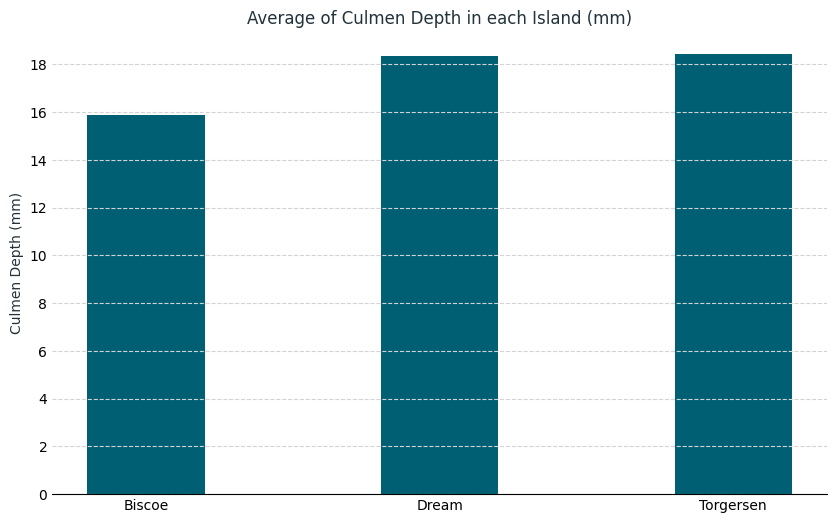

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(visible=True, axis='y', color='lightgray', ls='--')
ax.bar(culmen_depth_islands['island'], culmen_depth_islands['culmen_depth_mm'], color='#005f73', width=0.4)
ax.set_title('Average of Culmen Depth in each Island (mm)', fontsize=12, color='#22333b')
ax.set_ylabel('Culmen Depth (mm)', fontsize=10, color='#22333b')
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_yticks(range(0, round(max(culmen_depth_islands['culmen_depth_mm'])) + 2, 2))
plt.show()

In [19]:
body_mass_sex = clean_df.groupby('sex', as_index=False)['body_mass_g'].mean()
body_mass_sex

,sex,body_mass_g
0,FEMALE,3862.272727
1,MALE,4545.684524


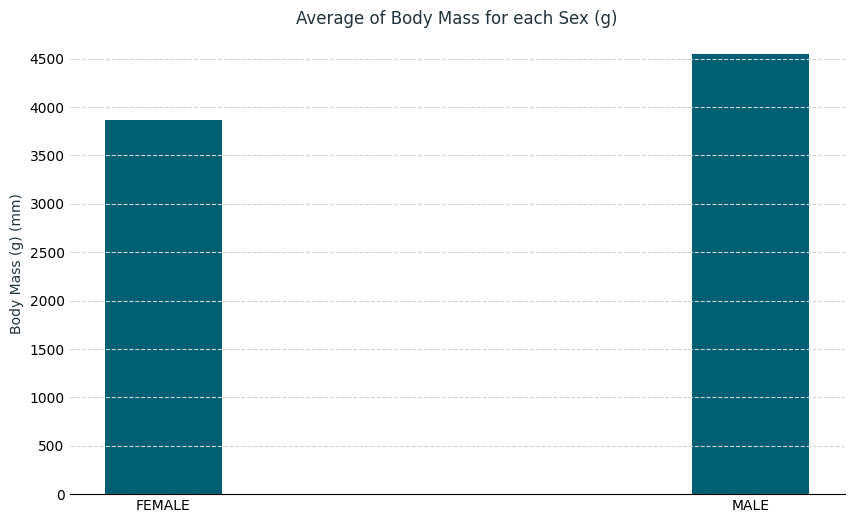

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(visible=True, axis='y', color='lightgray', ls='--')
ax.bar(body_mass_sex['sex'], body_mass_sex['body_mass_g'], color='#005f73', width=0.2)
ax.set_title('Average of Body Mass for each Sex (g)', fontsize=12, color='#22333b')
ax.set_ylabel('Body Mass (g) (mm)', fontsize=10, color='#22333b')
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_yticks(range(0, round(max(body_mass_sex['body_mass_g'])), 500))
plt.show()

In [21]:
species_islands = clean_df.groupby( ['species','island']).agg({'species': 'count'})
species_islands

species
species   island            
Adelie    Biscoe          44
          Dream           55
          Torgersen       47
Chinstrap Dream           68
Gentoo    Biscoe         119

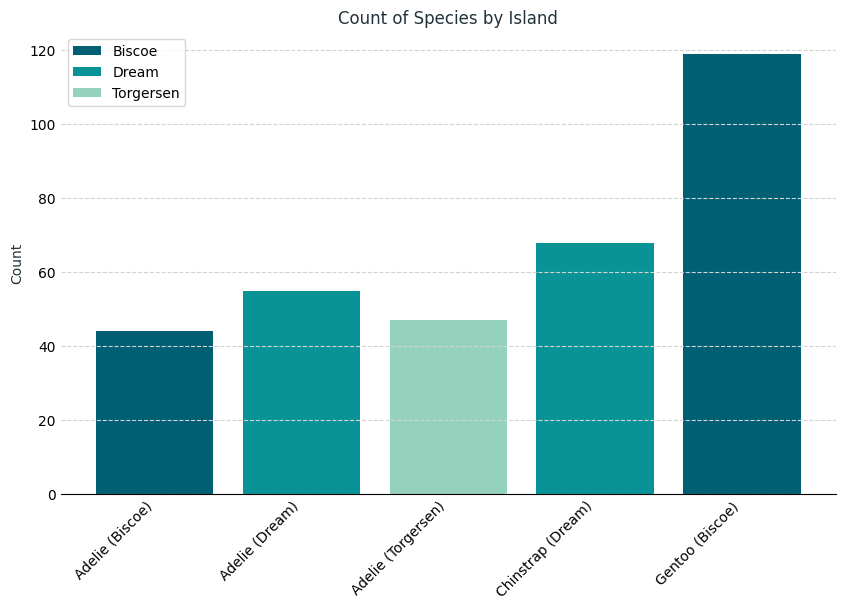

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(visible=True, axis='y', color='lightgray', ls='--')

island_colors = {'Biscoe': '#005f73', 'Dream': '#0a9396', 'Torgersen': '#94d2bd'}

species_labels = species_islands.index.get_level_values(0)
island_labels = species_islands.index.get_level_values(1)

for i, ((species, island), row) in enumerate(species_islands.iterrows()):
    ax.bar(f'{species} ({island})', row['species'], color=island_colors.get(island, '#000000'))

ax.set_title('Count of Species by Island', fontsize=12, color='#22333b')
ax.set_ylabel('Count', fontsize=10, color='#22333b')
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_xticks(range(len(species_islands)))
ax.set_xticklabels([f'{species} ({island})' for species, island in species_islands.index], rotation=45, ha='right')
plt.legend(island_labels.unique())
plt.show()

In [44]:
total_count_per_species = clean_df.groupby('species').size()

females = clean_df[clean_df['sex'] == 'FEMALE']
males = clean_df[clean_df['sex'] == 'MALE']

female_count_per_species = females.groupby('species').size()
male_count_per_species = males.groupby('species').size()

female_share_per_species = female_count_per_species / total_count_per_species
male_share_per_species = male_count_per_species / total_count_per_species

C:\Users\arian\AppData\Local\Temp\ipykernel_14776\1250775275.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(female_share_per_species.index, rotation=45, ha='right')


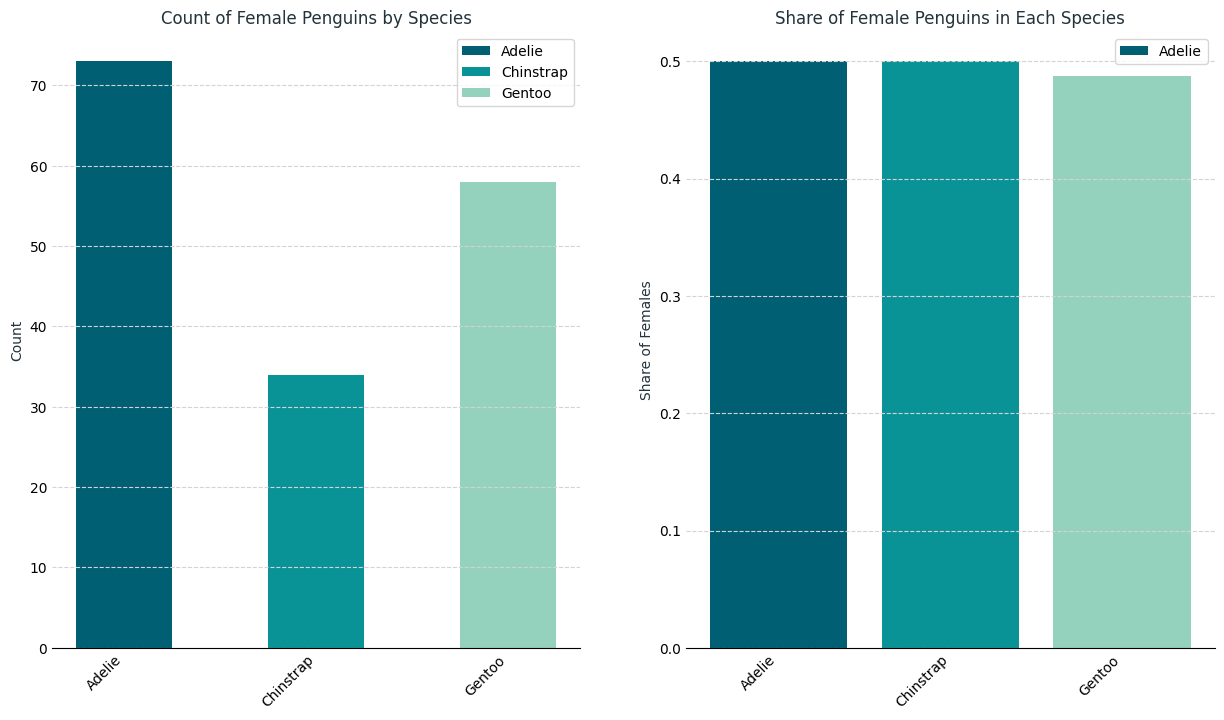

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
species_colors = {'Adelie': '#005f73', 'Chinstrap': '#0a9396', 'Gentoo': '#94d2bd'}
for species, count in female_count_per_species.items():
    ax1.bar(species, count, color=species_colors[species], width=0.5)

ax1.set_title('Count of Female Penguins by Species', fontsize=12, color='#22333b')
ax1.set_ylabel('Count', fontsize=10, color='#22333b')
ax1.spines[['right', 'left', 'top']].set_visible(False)
ax1.tick_params(length=0)
ax1.set_xticks(range(len(female_count_per_species)))
ax1.set_xticklabels(female_count_per_species.index, rotation=45, ha='right')
ax1.grid(visible=True, axis='y', color='lightgray', ls='--')
ax1.legend(female_count_per_species.index)

ax2.bar(female_share_per_species.index, female_share_per_species, color=[species_colors[species] for species in female_share_per_species.index])
ax2.set_title('Share of Female Penguins in Each Species', fontsize=12, color='#22333b')
ax2.set_ylabel('Share of Females', fontsize=10, color='#22333b')
ax2.spines[['right', 'left', 'top']].set_visible(False)
ax2.tick_params(length=0)
ax2.set_xticklabels(female_share_per_species.index, rotation=45, ha='right')
ax2.grid(visible=True, axis='y', color='lightgray', ls='--')

ax2.legend(female_share_per_species.index)


# plt.legend(female_count_per_species.index)

plt.show()

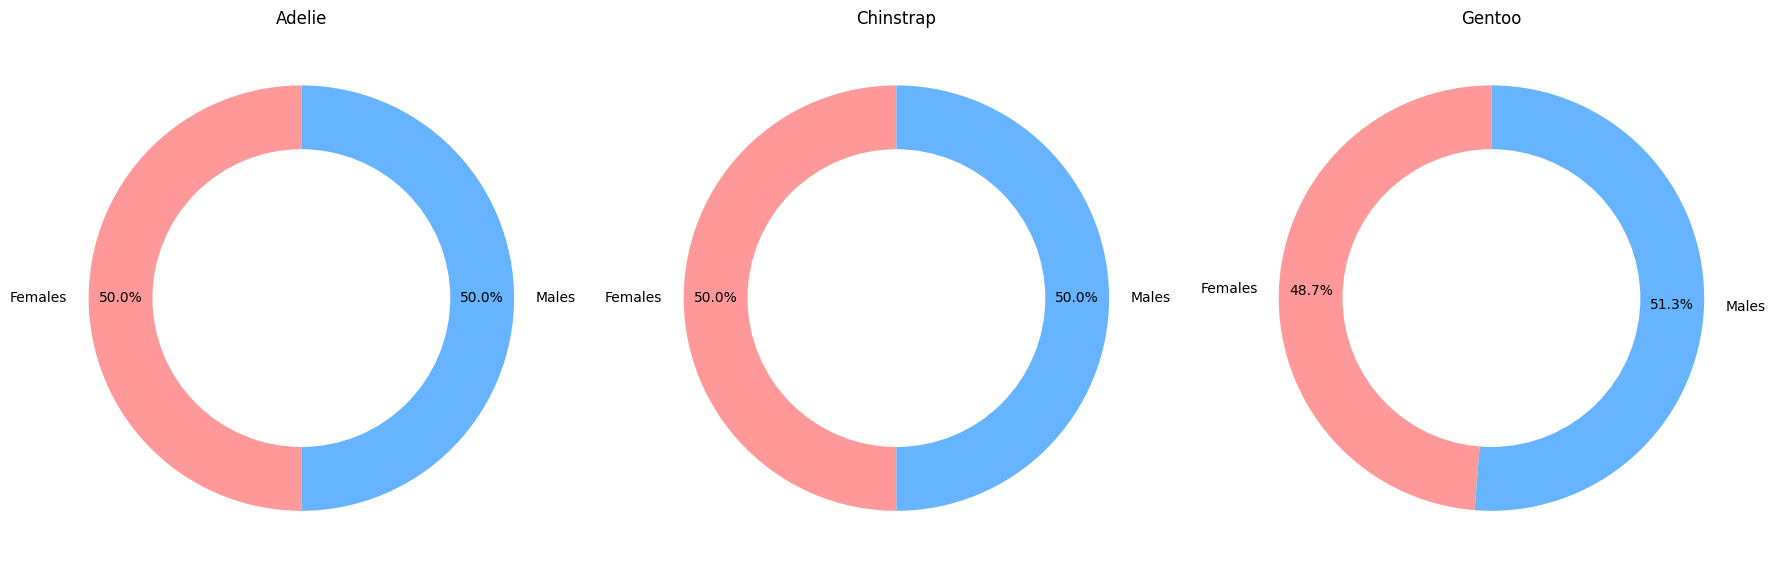

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, species in enumerate(female_share_per_species.index):
    ax = axes[i]
    data = [female_share_per_species[species], male_share_per_species[species]]
    colors = ['#ff9999','#66b3ff']
    ax.pie(data, colors=colors, startangle=90, pctdistance=0.85, labels=['Females', 'Males'], autopct='%1.1f%%')
    
    # Draw a circle at the center of pie to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)
    ax.set_title(species)

plt.tight_layout()
plt.show()

In [61]:
flipper_stats = clean_df.groupby('species')['flipper_length_mm'].agg(['min', 'max', 'mean'])
flipper_stats

,min,max,mean
species,,,
Adelie,172.0,210.0,190.102740
Chinstrap,178.0,212.0,195.823529
Gentoo,203.0,231.0,217.235294


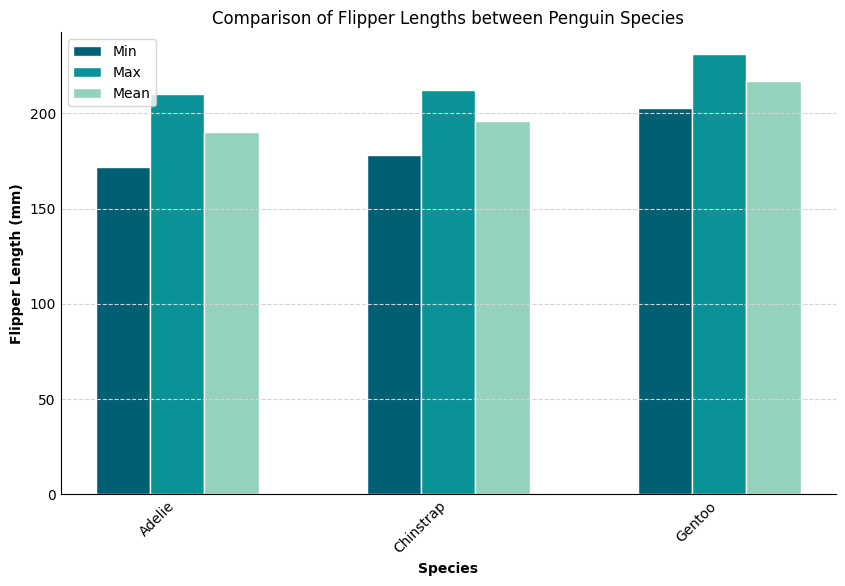

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

r1 = range(len(flipper_stats))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r1, flipper_stats['min'], color='#005f73', width=bar_width, edgecolor='white', label='Min')
ax.bar(r2, flipper_stats['max'], color='#0a9396', width=bar_width, edgecolor='white', label='Max')
ax.bar(r3, flipper_stats['mean'], color='#94d2bd', width=bar_width, edgecolor='white', label='Mean')

ax.set_xlabel('Species', fontweight='bold')
ax.set_ylabel('Flipper Length (mm)', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(flipper_stats))])
ax.set_xticklabels(flipper_stats.index)
ax.set_title('Comparison of Flipper Lengths between Penguin Species')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_xticklabels(female_share_per_species.index, rotation=45, ha='right')
ax.grid(visible=True, axis='y', color='lightgray', ls='--')

ax.legend()

plt.show()

# Statistical Analysis

In [79]:
import scipy.stats as stats

In [63]:
clean_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


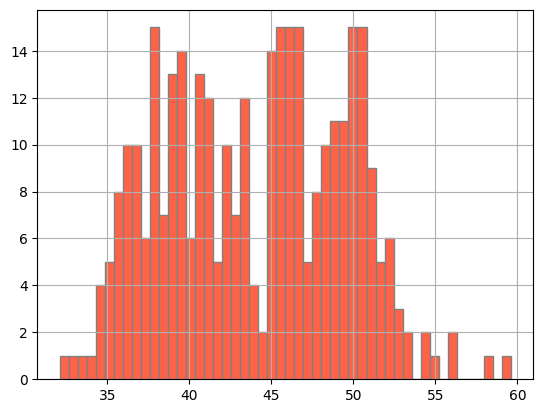

In [74]:
clean_df['culmen_length_mm'].hist(bins=50, edgecolor='gray', color='tomato')
plt.show()

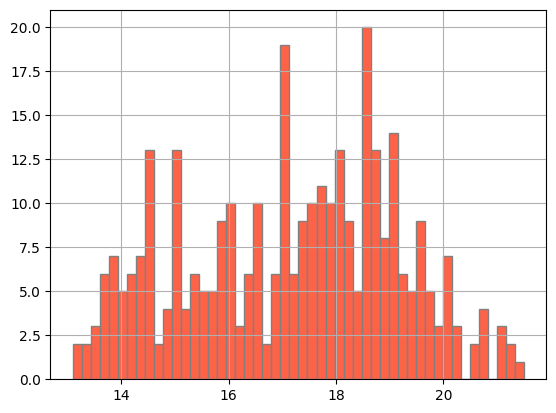

In [75]:
clean_df['culmen_depth_mm'].hist(bins=50, edgecolor='gray', color='tomato')
plt.show()

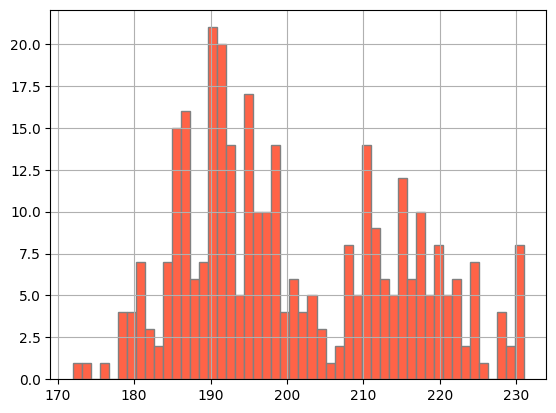

In [76]:
clean_df['flipper_length_mm'].hist(bins=50, edgecolor='gray', color='tomato')
plt.show()

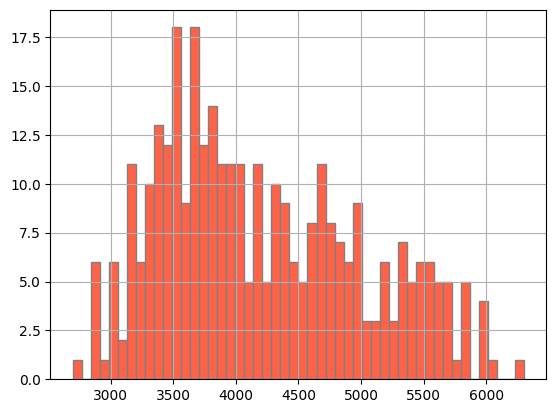

In [77]:
clean_df['body_mass_g'].hist(bins=50, edgecolor='gray', color='tomato')
plt.show()

## Hypothesis 1 : One of the species reside in all three islands. Let's check if residing in different islands effect species in **Body Mass**?

1. Filtering our data to only have rows with adelie species. (Since we have cleaned our data before)

2. Checking for normality in three categories (islands) using D'Agostino's K^2 also known as normality test. 

3. Checking if the variance of all three are equeal using levene test.

4. If our data is normal and have equal variance across all the islands, we can use ANOVA test to check if there are statistically significant differences in body mass of Adelie pinguins across all three islands.

In [83]:
adelie_penguins = clean_df[clean_df['species'] == 'Adelie']
adelie_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### Normal Test : To determine Normality

**Test Used**: D'Agostino's K^2 Test

**Hypotheses:**

* ***H0 (Null Hypothesis):*** The body mass distribution follows a normal distribution.
* ***H1 (Alternative Hypothesis):*** The body mass distribution does not follow a normal distribution.

In [84]:
normality_results_adelie = {island: stats.normaltest(group['body_mass_g']).pvalue for island, group in adelie_penguins.groupby('island')}
normality_results_adelie

{'Biscoe': 0.8632311954029706,
 'Dream': 0.14541984598491423,
 'Torgersen': 0.38266575900530925}

Since the p_values for all of the islands are more than 0.05, we can assume that our data is normal across all the islands.

### Levene Test : To determine if the variances are equal

**Test Used**: Levene's Test

**Hypotheses:**

* ***H0 (Null Hypothesis):*** Variances are equal across the groups.
* ***H1 (Alternative Hypothesis):*** At least one group has a variance that is different from the others.

In [86]:
_, homogeneity_p_value_adelie = stats.levene(
    adelie_penguins[adelie_penguins['island'] == 'Biscoe']['body_mass_g'],
    adelie_penguins[adelie_penguins['island'] == 'Dream']['body_mass_g'],
    adelie_penguins[adelie_penguins['island'] == 'Torgersen']['body_mass_g']
)

homogeneity_p_value_adelie

0.9442272615882789

Having a p_value of 0.94 is well above 0.05 and we can assume that our variance across all the islands are equal.

### Anova Test : To determine if there is statistically significant differences in body mass of the Adelie pinguins across the islands

**Test Used**: ANOVA Test

**Hypotheses:**

* ***H0 (Null Hypothesis):*** The mean body mass of Adelie penguins is the same across the different islands (Biscoe, Dream, and Torgersen).
* ***H1 (Alternative Hypothesis):*** There is a difference in the mean body mass of Adelie penguins between at least two of the islands.

In [88]:
anova_result = stats.f_oneway(
    adelie_penguins[adelie_penguins['island'] == 'Biscoe']['body_mass_g'],
    adelie_penguins[adelie_penguins['island'] == 'Dream']['body_mass_g'],
    adelie_penguins[adelie_penguins['island'] == 'Torgersen']['body_mass_g']
)

anova_result.pvalue

0.9951733909544992

Given the high p_value which is much greater than the typical alpha level (0.05), we fail to reject the null hypothesis of the ANOVA test. this means that the differences in the mean body mass of Adelie penguins between the islands are not statistically significant.

## Hypothesis 2 : One of the species reside in all three islands. Let's check if residing in different islands effect species in  **Culmen Length**?

1. Filtering our data to only have rows with adelie species. (Since we have cleaned our data before)

2. Checking for normality in three categories (islands) using D'Agostino's K^2 also known as normality test. 

3. Checking if the variance of all three are equeal using levene test.

4. If our data is normal and have equal variance across all the islands, we can use ANOVA test to check if there are statistically significant differences in culmen length of Adelie pinguins across all three islands.

In [90]:
normality_results_adelie_culmen_length = {island: stats.normaltest(group['culmen_length_mm']).pvalue for island, group in adelie_penguins.groupby('island')}

_, homogeneity_p_value_culmen_length = stats.levene(
    adelie_penguins[adelie_penguins['island'] == 'Biscoe']['culmen_length_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Dream']['culmen_length_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Torgersen']['culmen_length_mm']
)

homogeneity_p_value_culmen_length, normality_results_adelie_culmen_length

(0.3950991194947935,
 {'Biscoe': 0.7849190692855442,
  'Dream': 0.8481108071186432,
  'Torgersen': 0.6176122792744998})

Since all the p_values are more than 0.05, we can assume that our data is both normal and have equal variance across islands. Therefore we can use ANOVA test to determine if there are statistically significant differences in **Culmen Length** across the islands

**Test Used**: ANOVA Test

**Hypotheses:**

* ***H0 (Null Hypothesis):*** The mean culmen length of Adelie penguins is the same across the different islands (Biscoe, Dream, and Torgersen).
* ***H1 (Alternative Hypothesis):*** There is a difference in the mean culmen length of Adelie penguins between at least two of the islands.

In [91]:
anova_result = stats.f_oneway(
    adelie_penguins[adelie_penguins['island'] == 'Biscoe']['culmen_length_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Dream']['culmen_length_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Torgersen']['culmen_length_mm']
)

anova_result.pvalue

0.5622779773571562

The p-value (0.562) is much greater than the typical alpha level of 0.05. Therefore, we fail to reject the null hypothesis of the ANOVA test. This suggests that the differences in the mean culmen length of Adelie penguins between the islands are not statistically significant.

## Hypothesis 3 : One of the species reside in all three islands. Let's check if residing in different islands effect species in  **Culmen Depth**?

1. Filtering our data to only have rows with adelie species. (Since we have cleaned our data before)

2. Checking for normality in three categories (islands) using D'Agostino's K^2 also known as normality test. 

3. Checking if the variance of all three are equeal using levene test.

4. If our data is normal and have equal variance across all the islands, we can use ANOVA test to check if there are statistically significant differences in culmen depth of Adelie pinguins across all three islands.

In [92]:
normality_results_adelie_culmen_depth = {island: stats.normaltest(group['culmen_depth_mm']).pvalue for island, group in adelie_penguins.groupby('island')}

_, homogeneity_p_value_culmen_depth = stats.levene(
    adelie_penguins[adelie_penguins['island'] == 'Biscoe']['culmen_depth_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Dream']['culmen_depth_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Torgersen']['culmen_depth_mm']
)

homogeneity_p_value_culmen_depth, normality_results_adelie_culmen_length

(0.36240499538137616,
 {'Biscoe': 0.7849190692855442,
  'Dream': 0.8481108071186432,
  'Torgersen': 0.6176122792744998})

Since all the p_values are more than 0.05, we can assume that our data is both normal and have equal variance across islands. Therefore we can use ANOVA test to determine if there are statistically significant differences in **Culmen Depth** across the islands

**Test Used**: ANOVA Test

**Hypotheses:**

* ***H0 (Null Hypothesis):*** The mean culmen depth of Adelie penguins is the same across the different islands (Biscoe, Dream, and Torgersen).
* ***H1 (Alternative Hypothesis):*** There is a difference in the mean culmen depth of Adelie penguins between at least two of the island

In [93]:
anova_result = stats.f_oneway(
    adelie_penguins[adelie_penguins['island'] == 'Biscoe']['culmen_depth_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Dream']['culmen_depth_mm'],
    adelie_penguins[adelie_penguins['island'] == 'Torgersen']['culmen_depth_mm']
)

anova_result.pvalue

0.6792831811440548

The p-value (0.679) is much greater than the typical alpha level of 0.05. Therefore, we fail to reject the null hypothesis of the ANOVA test. This suggests that the differences in the mean culmen depth of Adelie penguins between the islands are not statistically significant.

## Hypothesis 4 : Is there a statistically significant difference between **Male** and **Female** species' physical traits?

***H0 (Null Hypothesis)***: There is no significant difference in [Trait] between male and female [Species] penguins.

***H1 (Alternative Hypothesis)***: There is a significant difference in [Trait] between male and female [Species] penguins.


#### Species : Adelie

In [98]:
adelie_data = clean_df[(clean_df['species'] == 'Adelie') & 
                            clean_df['sex'].isin(['MALE', 'FEMALE'])]

traits = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

results_adelie = {}

for trait in traits:
    male_trait = adelie_data[adelie_data['sex'] == 'MALE'][trait]
    female_trait = adelie_data[adelie_data['sex'] == 'FEMALE'][trait]

    _, p_normal_male = stats.normaltest(male_trait)
    _, p_normal_female = stats.normaltest(female_trait)

    if p_normal_male > 0.05 and p_normal_female > 0.05:
        test_stat, p_value = stats.ttest_ind(male_trait, female_trait)
        test_name = 't-test'
    else:
        test_stat, p_value = stats.mannwhitneyu(male_trait, female_trait)
        test_name = 'Mann-Whitney U'

    results_adelie[trait] = {'Test': test_name, 'Test Statistic': test_stat, 'p-value': p_value}

results_adelie

{'culmen_length_mm': {'Test': 't-test',
  'Test Statistic': 8.776549679516735,
  'p-value': 4.440459831648315e-15},
 'culmen_depth_mm': {'Test': 't-test',
  'Test Statistic': 8.927970976349796,
  'p-value': 1.8442146481787836e-15},
 'flipper_length_mm': {'Test': 't-test',
  'Test Statistic': 4.5588666963515765,
  'p-value': 1.08977531716496e-05},
 'body_mass_g': {'Test': 't-test',
  'Test Statistic': 13.126285923485874,
  'p-value': 2.2206436307866114e-26}}

* **Culmen Length (mm)**: Significant difference (t-test, p-value ≈ 4.44e-15)

* **Culmen Depth (mm)**: Significant difference (t-test, p-value ≈ 1.84e-15)

* **Flipper Length (mm)**: Significant difference (t-test, p-value ≈ 1.09e-05)

* **Body Mass (g)**: Significant difference (t-test, p-value ≈ 2.22e-26)

#### Species : Chinstrap

In [99]:
chinstrap_data = clean_df[(clean_df['species'] == 'Chinstrap') & 
                            clean_df['sex'].isin(['MALE', 'FEMALE'])]

traits = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

results_chinstrap = {}

for trait in traits:
    male_trait = chinstrap_data[chinstrap_data['sex'] == 'MALE'][trait]
    female_trait = chinstrap_data[chinstrap_data['sex'] == 'FEMALE'][trait]

    _, p_normal_male = stats.normaltest(male_trait)
    _, p_normal_female = stats.normaltest(female_trait)

    if p_normal_male > 0.05 and p_normal_female > 0.05:
        test_stat, p_value = stats.ttest_ind(male_trait, female_trait)
        test_name = 't-test'
    else:
        test_stat, p_value = stats.mannwhitneyu(male_trait, female_trait)
        test_name = 'Mann-Whitney U'

    results_chinstrap[trait] = {'Test': test_name, 'Test Statistic': test_stat, 'p-value': p_value}

results_chinstrap

{'culmen_length_mm': {'Test': 'Mann-Whitney U',
  'Test Statistic': 1067.5,
  'p-value': 1.987454187079304e-09},
 'culmen_depth_mm': {'Test': 't-test',
  'Test Statistic': 8.899360401984621,
  'p-value': 6.563879282777932e-13},
 'flipper_length_mm': {'Test': 't-test',
  'Test Statistic': 5.746719446696214,
  'p-value': 2.5258867415019786e-07},
 'body_mass_g': {'Test': 't-test',
  'Test Statistic': 5.20773384899266,
  'p-value': 2.043956471470739e-06}}

* **Culmen Length (mm)**: Significant difference (Mann-Whitney U, p-value ≈ 1.99e-09)

* **Culmen Depth (mm)**: Significant difference (t-test, p-value ≈ 6.56e-13)

* **Flipper Length (mm)**: Significant difference (t-test, p-value ≈ 2.53e-07)

* **Body Mass (g)**: Significant difference (t-test, p-value ≈ 2.04e-06)

#### Species : Gentoo

In [100]:
gentoo_data = clean_df[(clean_df['species'] == 'Gentoo') & 
                            clean_df['sex'].isin(['MALE', 'FEMALE'])]

traits = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

results_gentoo = {}

for trait in traits:
    male_trait = gentoo_data[gentoo_data['sex'] == 'MALE'][trait]
    female_trait = gentoo_data[gentoo_data['sex'] == 'FEMALE'][trait]

    _, p_normal_male = stats.normaltest(male_trait)
    _, p_normal_female = stats.normaltest(female_trait)

    if p_normal_male > 0.05 and p_normal_female > 0.05:
        test_stat, p_value = stats.ttest_ind(male_trait, female_trait)
        test_name = 't-test'
    else:
        test_stat, p_value = stats.mannwhitneyu(male_trait, female_trait)
        test_name = 'Mann-Whitney U'

    results_gentoo[trait] = {'Test': test_name, 'Test Statistic': test_stat, 'p-value': p_value}

results_gentoo

{'culmen_length_mm': {'Test': 'Mann-Whitney U',
  'Test Statistic': 3125.5,
  'p-value': 5.58594267834405e-13},
 'culmen_depth_mm': {'Test': 't-test',
  'Test Statistic': 12.39673350686303,
  'p-value': 4.7575545950646463e-23},
 'flipper_length_mm': {'Test': 't-test',
  'Test Statistic': 9.851469413888289,
  'p-value': 4.874629540984741e-17},
 'body_mass_g': {'Test': 't-test',
  'Test Statistic': 14.721676481405709,
  'p-value': 2.133687602018886e-28}}

* **Culmen Length (mm)**: Significant difference (Mann-Whitney U, p-value ≈ 5.59e-13)

* **Culmen Depth (mm)**: Significant difference (t-test, p-value ≈ 4.76e-23)

* **Flipper Length (mm)**: Significant difference (t-test, p-value ≈ 4.87e-17)

* **Body Mass (g)**: Significant difference (t-test, p-value ≈ 2.13e-28)

## Correlation Analysis

Determine if there is a significant correlation between different measurements like culmen length, culmen depth, flipper length, and body mass. This can be done using Pearson or Spearman correlation coefficients, depending on the data distribution.

In [96]:
# Checking for normality of the data
_, p_culmen_length = stats.normaltest(clean_df['culmen_length_mm'])
_, p_culmen_depth = stats.normaltest(clean_df['culmen_depth_mm'])
_, p_flipper_length = stats.normaltest(clean_df['flipper_length_mm'])
_, p_body_mass = stats.normaltest(clean_df['body_mass_g'])

normality_p_values = {
    'culmen_length_mm': p_culmen_length,
    'culmen_depth_mm': p_culmen_depth,
    'flipper_length_mm': p_flipper_length,
    'body_mass_g': p_body_mass
}

normality_p_values


{'culmen_length_mm': 8.089051684631694e-09,
 'culmen_depth_mm': 2.180247862696564e-09,
 'flipper_length_mm': 8.953042512179693e-14,
 'body_mass_g': 2.4253938728054785e-07}

In [97]:
# Choosing Pearson or Spearman based on normality test
if all(p_val > 0.05 for p_val in normality_p_values.values()):
    correlation_matrix = clean_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr(method='pearson')
else:
    correlation_matrix = clean_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr(method='spearman')

correlation_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.213859,0.669754,0.576480
culmen_depth_mm,-0.213859,1.000000,-0.517317,-0.429283
flipper_length_mm,0.669754,-0.517317,1.000000,0.840390
body_mass_g,0.576480,-0.429283,0.840390,1.000000


* **Culmen Length and Flipper Length**: Positive moderate correlation (0.673). This suggests that penguins with longer culmens tend to have longer flippers.

* **Culmen Length and Body Mass**: Positive moderate correlation (0.584). Indicates that penguins with longer culmens tend to have a higher body mass.

* **Flipper Length and Body Mass**: Strong positive correlation (0.840). Penguins with longer flippers tend to have a higher body mass.

* **Culmen Depth and Flipper Length**: Negative moderate correlation (-0.523). Penguins with deeper culmens tend to have shorter flippers.

* **Culmen Depth and Body Mass**: Negative moderate correlation (-0.432). Penguins with deeper culmens tend to have lower body mass.